In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, "../")
from paths import FIG_DIR, DATA_DIR

In [21]:
num_rep = 100000
rng = np.random.default_rng(2804)
results = {}

for alpha in [0.01, 0.125, 0.25, 0.5, 1, 2, 5, 10]:
    for m in [5, 10, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500]:
        ssb_utility = np.triu(np.ones((m, m))) - np.tril(np.ones((m, m)))
        alpha_vec = np.ones(m) * alpha
        lotteries = rng.dirichlet(alpha_vec, (3, num_rep))
        comp01 = (np.sum(lotteries[0,:,:] @ ssb_utility * lotteries[1,:,:], axis=1) > 0).astype(int)
        comp12 = (np.sum(lotteries[1,:,:] @ ssb_utility * lotteries[2,:,:], axis=1) > 0).astype(int)
        comp20 = (np.sum(lotteries[2,:,:] @ ssb_utility * lotteries[0,:,:], axis=1) > 0).astype(int)
        num_intr = np.sum(comp01 + comp12 + comp20 == 0) + np.sum(comp01 + comp12 + comp20 == 3)
        print(f"For m = {m} and alpha = {alpha} were {num_intr} of {num_rep} triples intransitive.")
        results[(m, alpha)] = num_intr
    print("")

For m = 5 and alpha = 0.01 were 16 of 100000 triples intransitive.
For m = 10 and alpha = 0.01 were 41 of 100000 triples intransitive.
For m = 15 and alpha = 0.01 were 106 of 100000 triples intransitive.
For m = 20 and alpha = 0.01 were 168 of 100000 triples intransitive.
For m = 30 and alpha = 0.01 were 356 of 100000 triples intransitive.
For m = 50 and alpha = 0.01 were 662 of 100000 triples intransitive.
For m = 70 and alpha = 0.01 were 924 of 100000 triples intransitive.
For m = 100 and alpha = 0.01 were 1174 of 100000 triples intransitive.
For m = 150 and alpha = 0.01 were 1305 of 100000 triples intransitive.
For m = 200 and alpha = 0.01 were 1324 of 100000 triples intransitive.
For m = 300 and alpha = 0.01 were 1246 of 100000 triples intransitive.
For m = 500 and alpha = 0.01 were 1011 of 100000 triples intransitive.

For m = 5 and alpha = 0.125 were 166 of 100000 triples intransitive.
For m = 10 and alpha = 0.125 were 696 of 100000 triples intransitive.
For m = 15 and alpha = 0.

In [22]:
df = pd.DataFrame.from_dict(results, orient="index", columns=["num_intransitive"])
df.index = pd.MultiIndex.from_tuples(df.index, names=["m", "alpha"])
df = df.reset_index()
df["m"] = df["m"].astype(int)
df["alpha"] = df["alpha"].astype(float)
df

,m,alpha,num_intransitive
0,5,0.01,16
1,10,0.01,41
2,15,0.01,106
3,20,0.01,168
4,30,0.01,356
...,...,...,...
91,100,10.00,10
92,150,10.00,4
93,200,10.00,5
94,300,10.00,5


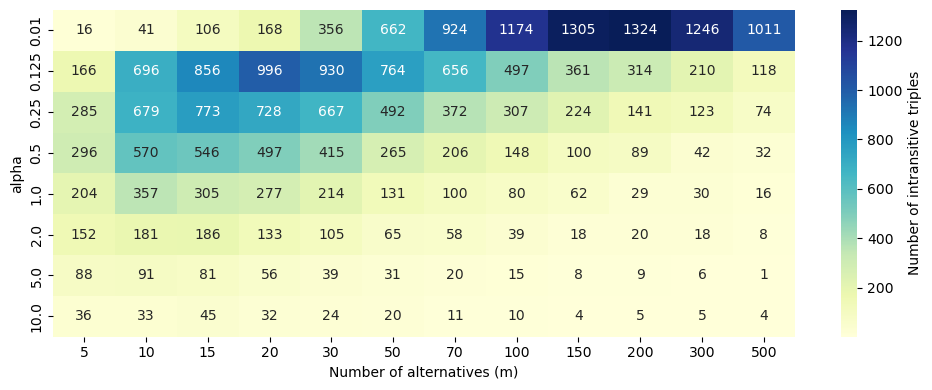

In [23]:
heatmap_data = df.pivot(index="alpha", columns="m", values="num_intransitive")
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of intransitive triples'})
plt.xlabel("Number of alternatives (m)")
plt.ylabel("alpha")
plt.tight_layout()
plt.show()